In [1]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

* print top 5 rows of world data-frame

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [4]:
world.shape

(177, 6)

In [5]:
world.dtypes

pop_est          int64
continent       object
name            object
iso_a3          object
gdp_md_est     float64
geometry      geometry
dtype: object

In [6]:
world.describe()

,pop_est,gdp_md_est
count,1.770000e+02,1.770000e+02
mean,4.171237e+07,6.668967e+05
std,1.459691e+08,2.289440e+06
min,1.400000e+02,1.600000e+01
25%,3.360148e+06,2.581000e+04
50%,9.961396e+06,8.493000e+04
75%,2.938430e+07,4.104000e+05
max,1.379303e+09,2.114000e+07


In [7]:
world.describe(include='object')

,continent,name,iso_a3
count,177,177,177
unique,8,177,173
top,Africa,Fiji,-99
freq,51,1,5


* remove continents which have only one country in data-frame


In [8]:
# continents with only one country

Note that from the data exploration above, no country 
appears more than once in the "world" dataframe.

In [9]:
world['continent'].value_counts()

Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: continent, dtype: int64

In [10]:
cnt_counts = world['continent'].value_counts()
cnts_to_drop = cnt_counts[(cnt_counts==1)].index.tolist()
cnts_to_drop

['Seven seas (open ocean)', 'Antarctica']

In [11]:
# remove these continents

In [12]:
# Remove the continents and reset the index.

world = world[~(world['continent'].isin(cnts_to_drop))]
world.reset_index(drop=True, inplace=True)
world.shape

(175, 6)

In [13]:
# Check to make sure we removed the continents with only one country.

world['continent'].value_counts()

Africa           51
Asia             47
Europe           39
North America    18
South America    13
Oceania           7
Name: continent, dtype: int64

* create dataframe with top 3 most populated countries from each continent
* store the result in data-frame with name 'world_filtered'

In [14]:
# Group the dataframe by continent and then for each continent, 
# find the 3 countries with the largest population.

df_grouped = world.groupby('continent')['pop_est'].nlargest(3)
df_grouped

continent         
Africa         55      190632261
               163     105350020
               161      97041072
Asia           138    1379302771
               97     1281935911
               8       260580739
Europe         18      142257519
               120      80594017
               42       67106161
North America  4       326625791
               26      124574795
               3        35623680
Oceania        136      23232413
               7         6909701
               135       4510327
South America  28      207353391
               31       47698524
               9        44293293
Name: pop_est, dtype: int64

In [15]:
# Check one example.

world.iloc[55]

pop_est                                               190632261
continent                                                Africa
name                                                    Nigeria
iso_a3                                                      NGA
gdp_md_est                                            1089000.0
geometry      POLYGON ((2.6917016943562544 6.258817246928629...
Name: 55, dtype: object

We need the indices from df_grouped.  We will check the index of df_grouped.

In [16]:
df_grouped.index

MultiIndex([(       'Africa',  55),
            (       'Africa', 163),
            (       'Africa', 161),
            (         'Asia', 138),
            (         'Asia',  97),
            (         'Asia',   8),
            (       'Europe',  18),
            (       'Europe', 120),
            (       'Europe',  42),
            ('North America',   4),
            ('North America',  26),
            ('North America',   3),
            (      'Oceania', 136),
            (      'Oceania',   7),
            (      'Oceania', 135),
            ('South America',  28),
            ('South America',  31),
            ('South America',   9)],
           names=['continent', None])

The indices that we need are the first level of the df_grouped MultiIndex.

In [17]:
top_cntry_index = df_grouped.index.get_level_values(1)

In [18]:
world_filtered = world.iloc[top_cntry_index]
world_filtered

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
55,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.692 6.259, 2.749 7.871, 2.724 8.50..."
163,105350020,Africa,Ethiopia,ETH,174700.0,"POLYGON ((47.789 8.003, 44.964 5.002, 43.661 4..."
161,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.866 22.000, 32.900 22.000, 29.020..."
138,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.475 18.198, 108.655 18.508..."
97,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.327 28.262, 97.403 27.883, 97.052..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.000 -2.600, 141.017 -5.859..."
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."
120,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.120 53.757, 14.353 53.248, 14.075..."
42,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0..."


* print 'world_filtered' data-frame

In [19]:
print(world_filtered)

        pop_est      continent                      name iso_a3  gdp_md_est  \
55    190632261         Africa                   Nigeria    NGA   1089000.0   
163   105350020         Africa                  Ethiopia    ETH    174700.0   
161    97041072         Africa                     Egypt    EGY   1105000.0   
138  1379302771           Asia                     China    CHN  21140000.0   
97   1281935911           Asia                     India    IND   8721000.0   
8     260580739           Asia                 Indonesia    IDN   3028000.0   
18    142257519         Europe                    Russia    RUS   3745000.0   
120    80594017         Europe                   Germany    DEU   3979000.0   
42     67106161         Europe                    France    -99   2699000.0   
4     326625791  North America  United States of America    USA  18560000.0   
26    124574795  North America                    Mexico    MEX   2307000.0   
3      35623680  North America                    Ca

Create choropleth map of world:
-
    - using **Geopandas**
    - using **Plotly**
* the colors of countries from 'world_filtered' are based on population
* other countries can stay white

/Users/ryanferns/opt/anaconda3/envs/geo_env_2/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot: >

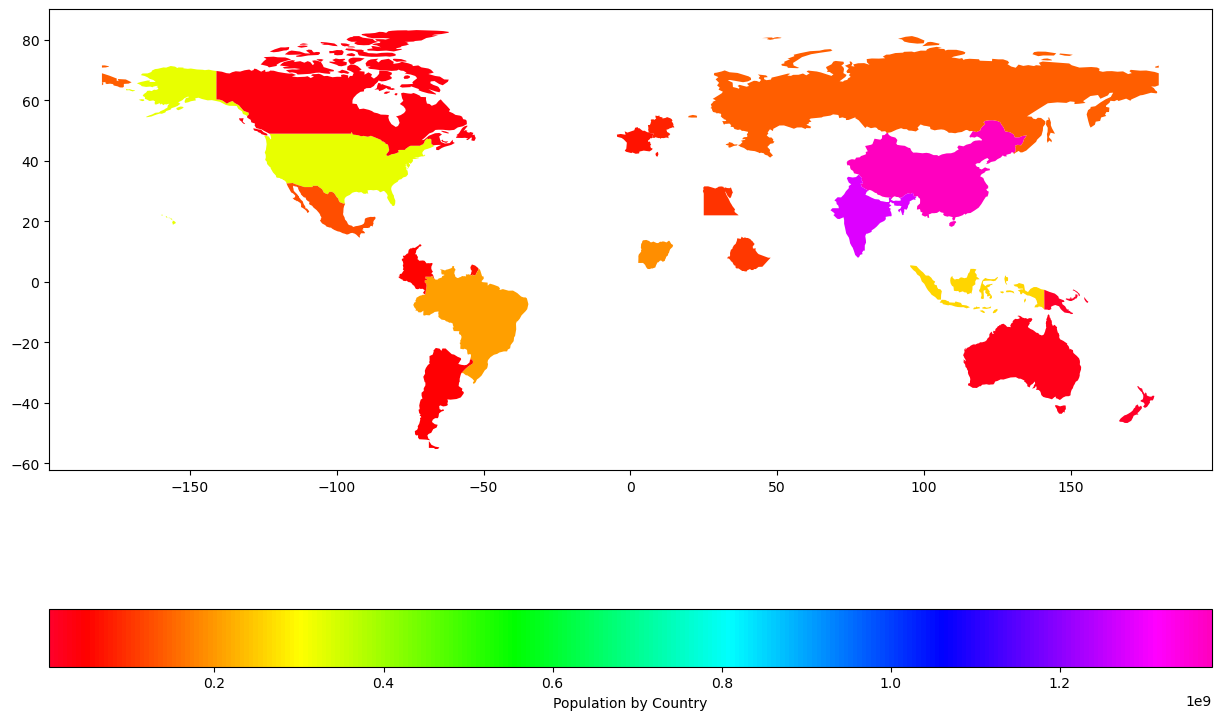

In [20]:
# GeoPandas
# create figure and axes

fig, ax = plt.subplots(figsize=(15,12))

# create map from world_filtered data-frame

world_filtered.plot(
    column='pop_est',
    cmap='gist_rainbow',
    ax=ax, 
    legend=True,
    legend_kwds={
        'label': "Population by Country",
        'orientation': "horizontal"
    }
)

In [21]:
# add the rest of the countries

In [22]:
# Create new dataframe from 'world' dataframe by removing
# the countries from 'world_filtered' dataframe.

world_2 = world.drop(
    labels=top_cntry_index,
    axis=0
)

/Users/ryanferns/opt/anaconda3/envs/geo_env_2/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/ryanferns/opt/anaconda3/envs/geo_env_2/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


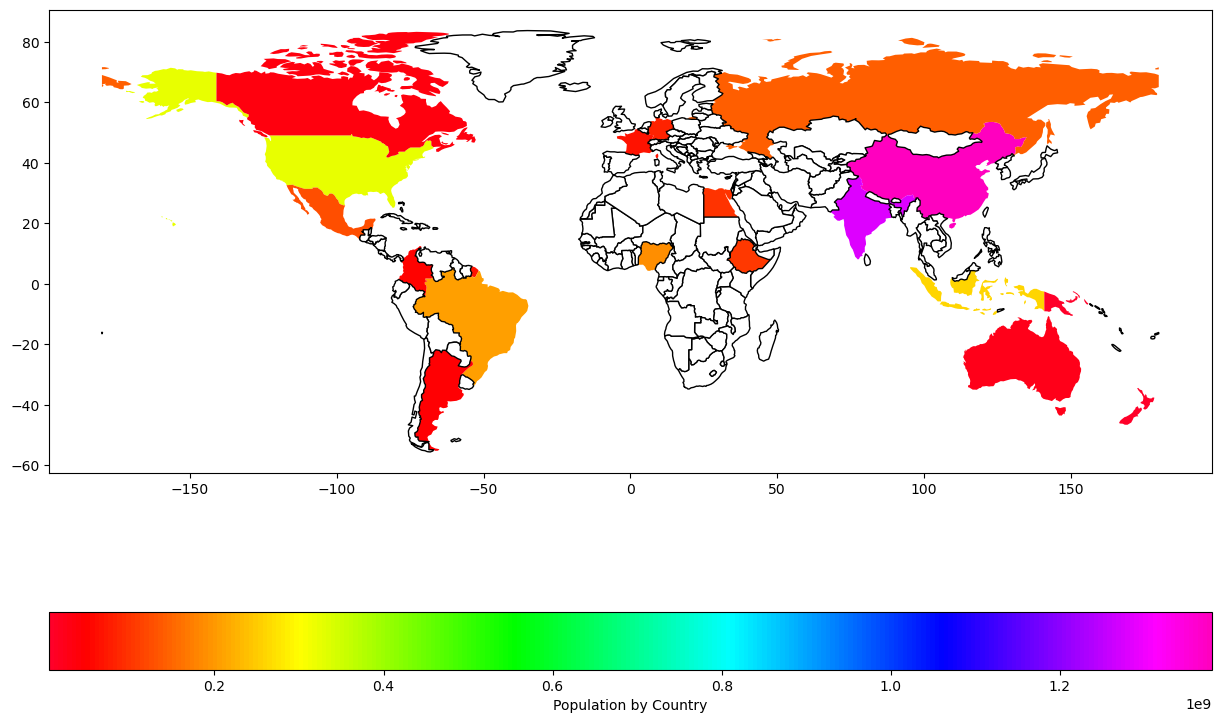

In [23]:
# GeoPandas
# create figure and axes

fig, ax = plt.subplots(figsize=(15,12))

# create map from world_filtered data-frame

world_filtered.plot(
    column='pop_est',
    cmap='gist_rainbow',
    ax=ax, 
    legend=True,
    legend_kwds={
        'label': "Population by Country",
        'orientation': "horizontal"
    }
)

# add the rest of the countries
# Plot the 'world_2' dataframe with the new countries coloured white.
# The edges are coloured black so that we can see them.

world_2.plot(
    color='white',
    ax=ax,
    edgecolor='black'
)
plt.show()

In Geopandas:
* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
* to get geometry of these cities use gpd.tools.geocode(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
* if you do not have geopy library instaled, install it with the following command in the jupyter notebook cell
* !pip install geopy

In [24]:
main_cities = [
    'New York', 
    'Berlin', 
    'Paris',
    'Toronto', 
    'Calgary', 
    'Tokyo'
]

In [25]:
# get geometry

df_main_cities = gpd.tools.geocode(
    strings=main_cities,
    provider='photon'
)

In [26]:
df_main_cities

,geometry,address
0,POINT (-74.00602 40.71273),"New York, New York, United States"
1,POINT (13.38886 52.51704),"Berlin, Deutschland"
2,POINT (2.32004 48.85889),"Paris, 75000;75001;75002;75003;75004;75005;750..."
3,POINT (-79.38393 43.65348),"Toronto, Toronto, Ontario, Canada"
4,POINT (-114.06547 51.04610),"Calgary, Alberta, Canada"
5,POINT (139.74394 35.68474),"Tokyo MX, Kojimachi, 102-0083, Kojimachi, 千代田区..."


In [27]:
# Add a 'city' column to df_main_cities.

df_main_cities['city'] = main_cities
df_main_cities

,geometry,address,city
0,POINT (-74.00602 40.71273),"New York, New York, United States",New York
1,POINT (13.38886 52.51704),"Berlin, Deutschland",Berlin
2,POINT (2.32004 48.85889),"Paris, 75000;75001;75002;75003;75004;75005;750...",Paris
3,POINT (-79.38393 43.65348),"Toronto, Toronto, Ontario, Canada",Toronto
4,POINT (-114.06547 51.04610),"Calgary, Alberta, Canada",Calgary
5,POINT (139.74394 35.68474),"Tokyo MX, Kojimachi, 102-0083, Kojimachi, 千代田区...",Tokyo


/Users/ryanferns/opt/anaconda3/envs/geo_env_2/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/ryanferns/opt/anaconda3/envs/geo_env_2/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


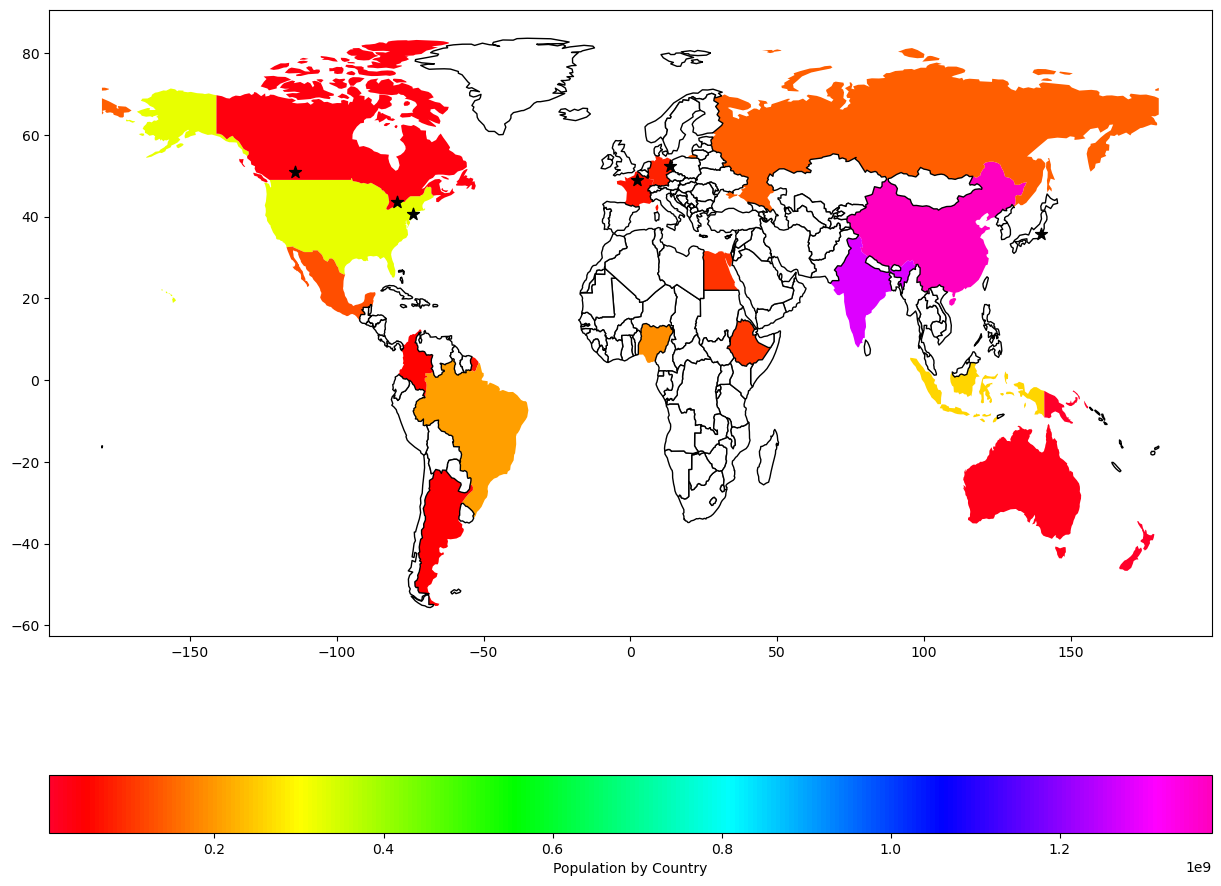

In [28]:
# get geometry


# create figure and axes

fig, ax = plt.subplots(figsize=(15,12))

# create map from world_filtered data-frame

world_filtered.plot(
    column='pop_est',
    cmap='gist_rainbow',
    ax=ax, 
    legend=True,
    legend_kwds={
        'label': "Population by Country",
        'orientation': "horizontal"
    }
)

# add the rest of the countries

world_2.plot(
    color='white',
    ax=ax,
    edgecolor='black'
)

# add cities

df_main_cities.plot(
    ax=ax,
    marker='*',
    color='black',
    markersize=80
)
plt.show()